# Feature Selection 

We use feature selection to select feature that are useful to the model.

* Irrelevant features may have a negetive effect on a model. 
* Correlated features can make coefficients in regression (or feature importance in tree models) unstable or difficult to interpret. 

The _curse of dimensionality_ is another issue to consider. As you increase the number of dimension of your data, it becomes more sparse. This can make it difficult to pull out a signal unless you have more data. Neighbor calculations tend to lose their usefulness as more dimensions are added.

Also training time is usually a function of the number of columns (and sometimes it is worse than linear). 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_excel('titanic3.xls')

In [3]:
agg = (df.groupby('cabin').agg('min,max,mean,sum'.split(',')).reset_index())

In [4]:
agg.columns = ['_'.join(c).strip('_') for c in agg.columns.values]

In [5]:
agg_df = df.merge(agg, on ='cabin')

In [6]:
agg_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,parch_mean,parch_sum,fare_min,fare_max,fare_mean,fare_sum,body_min,body_max,body_mean,body_sum
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,0.5,1,211.3375,211.3375,211.3375,422.675,NaN,NaN,NaN,0.0
1,1,1,"Madill, Miss. Georgette Alexandra",female,15.0000,0,1,24160,211.3375,B5,...,0.5,1,211.3375,211.3375,211.3375,422.675,NaN,NaN,NaN,0.0
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,2.0,8,151.5500,151.5500,151.5500,606.200,135.0,135.0,135.0,135.0
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,2.0,8,151.5500,151.5500,151.5500,606.200,135.0,135.0,135.0,135.0
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,2.0,8,151.5500,151.5500,151.5500,606.200,135.0,135.0,135.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0000,0,2,PP 9549,16.7000,G6,...,1.2,6,10.4625,16.7000,14.2050,71.025,NaN,NaN,NaN,0.0
291,3,1,"Sandstrom, Miss. Marguerite Rut",female,4.0000,1,1,PP 9549,16.7000,G6,...,1.2,6,10.4625,16.7000,14.2050,71.025,NaN,NaN,NaN,0.0
292,3,0,"Strom, Miss. Telma Matilda",female,2.0000,0,1,347054,10.4625,G6,...,1.2,6,10.4625,16.7000,14.2050,71.025,NaN,NaN,NaN,0.0
293,3,0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0000,1,1,347054,10.4625,G6,...,1.2,6,10.4625,16.7000,14.2050,71.025,NaN,NaN,NaN,0.0


## Collinear columns

In [7]:
def correlated_columns(df, threshold = 0.95):
    return(
            df.corr().pipe(
                lambda df1: pd.DataFrame(
                np.tril(df1, k=-1), columns= df.columns, index= df.columns)).stack().rename('pearson').pipe(
            lambda s:s[s.abs()> threshold].reset_index()).query('level_0 not in level_1'))

`numpy.triu(m, k=0)` -> Upper triangle of an array. Return a copy of an array with the elements below the k-th diagonal zeroed

https://numpy.org/doc/stable/reference/generated/numpy.triu.html

In [8]:
limit = 0.95
corr = agg_df.corr()
mask = np.triu(np.ones(corr.shape), k = 1).astype(bool)

In [9]:
mask

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [10]:
corr_no_diag = corr.where(mask)

In [11]:
corr_no_diag

,pclass,survived,age,sibsp,parch,fare,body,pclass_min,pclass_max,pclass_mean,...,parch_mean,parch_sum,fare_min,fare_max,fare_mean,fare_sum,body_min,body_max,body_mean,body_sum
pclass,NaN,-0.013737,-0.338608,-0.110235,0.031053,-0.313012,-0.001275,1.000000,1.000000,1.000000,...,0.033058,0.067205,-0.333985,-0.304595,-0.328897,-0.184594,-0.093504,-0.093504,-0.093504,0.039864
survived,NaN,NaN,-0.207643,0.147828,0.095863,0.104499,NaN,-0.013737,-0.013737,-0.013737,...,0.089167,0.063053,0.077773,0.071811,0.076971,0.065400,-0.065309,-0.065309,-0.065309,-0.379099
age,NaN,NaN,NaN,-0.080817,-0.161294,0.013872,0.047948,-0.338608,-0.338608,-0.338608,...,-0.219792,-0.224602,-0.016911,0.006568,-0.000427,-0.067864,0.190493,0.190493,0.190493,0.134186
sibsp,NaN,NaN,NaN,NaN,0.266089,0.279720,0.040477,-0.110235,-0.110235,-0.110235,...,0.372616,0.512242,0.335545,0.254082,0.292785,0.516349,-0.089987,-0.089987,-0.089987,-0.058475
parch,NaN,NaN,NaN,NaN,NaN,0.391883,-0.145454,0.031053,0.031053,0.031053,...,0.939334,0.824436,0.401671,0.360905,0.390905,0.604844,-0.114803,-0.114803,-0.114803,-0.027587
fare,NaN,NaN,NaN,NaN,NaN,NaN,-0.268160,-0.313012,-0.313012,-0.313012,...,0.396051,0.439702,0.849813,0.933658,0.951700,0.756684,-0.182833,-0.182833,-0.182833,-0.060429
body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001275,-0.001275,-0.001275,...,-0.025873,-0.111546,-0.265142,-0.268160,-0.267568,-0.188574,1.000000,1.000000,1.000000,1.000000
pclass_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,0.033058,0.067205,-0.333985,-0.304595,-0.328897,-0.184594,-0.093504,-0.093504,-0.093504,0.039864
pclass_max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,0.033058,0.067205,-0.333985,-0.304595,-0.328897,-0.184594,-0.093504,-0.093504,-0.093504,0.039864
pclass_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033058,0.067205,-0.333985,-0.304595,-0.328897,-0.184594,-0.093504,-0.093504,-0.093504,0.039864


In [12]:
coll = [c for c in corr_no_diag.columns if any(abs(corr_no_diag[c])>limit)]

In [13]:
coll

['pclass_min',
 'pclass_max',
 'pclass_mean',
 'sibsp_mean',
 'parch_mean',
 'fare_mean',
 'body_min',
 'body_max',
 'body_mean',
 'body_sum']

The `rfpimp` package has a visualization of _multicollinearity_. The `plot_dependence_heatmap` function trains a random forest for each numeric column from the other columns in a training dataset. The dependence value is the R2 score form the out-of-bag (OOB) estimates for predicting that column. 

The suggested way to use this plot is to find values close to 1. The label on the X axis is the feature that predicts the Y axis label. If a feature predicts another, you can remove the predicted feature ( the feature on the Y axis). In our example, `fare` predicts `pclass`, `sibsp` and others. We should be able to keep `fare` and remove the others and get similar performances. 

In [14]:
#! pip install rfpimp

In [15]:
import rfpimp

In [16]:
X_train = pd.read_excel('X_train.xls')

In [17]:
y_test = pd.read_excel('y_test.xls')
X_test = pd.read_excel('X_test.xls')

In [18]:
y_train = pd.read_excel('y_train.xls')

In [19]:
files = [X_train, X_test, y_train, y_test]
for file in files :
    file.drop(columns='Unnamed: 0', inplace = True)

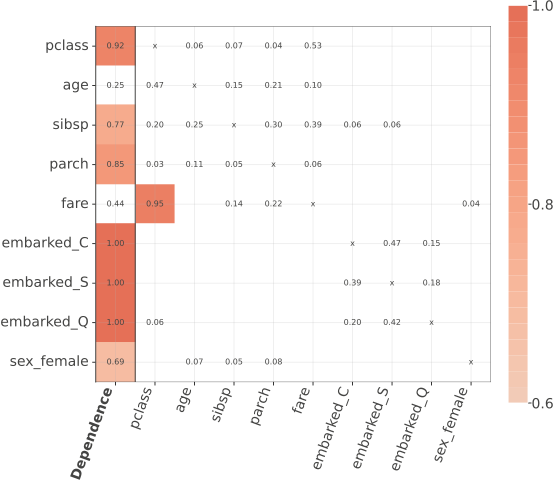

In [20]:
rfpimp.plot_dependence_heatmap(rfpimp.feature_dependence_matrix(X_train), label_fontsize=14, 
                               figsize = (8,8))

Here is code showing that we get a similar score if we remove these columns.

In [21]:
cols_to_remove = [
    'pclass',
    'sibsp',
    'parch',
    'embarked_Q'
]

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion = 'gini', max_depth=None, max_features='auto',
                      max_leaf_nodes='auto', 
                      min_impurity_decrease=0.0,
                      min_samples_split=None,
                      min_samples_leaf=1,
                      min_impurity_split=2,
                      min_weight_fraction_leaf=0.0,
                      n_estimators= 10, 
                      n_jobs=1,
                      oob_score=False,
                      random_state=42,
                      verbose=0,
                      warm_start=False)

RandomForestClassifier(max_leaf_nodes='auto', min_impurity_split=2,
                       min_samples_split=None, n_estimators=10, n_jobs=1,
                       random_state=42)

In [24]:
rf3 = RandomForestClassifier(random_state=42)

In [25]:
rf3.fit(X_train[[c for c in X_train.columns if c not in cols_to_remove]], y_train)

C:\Users\alber\AppData\Local\Temp/ipykernel_16592/3752766443.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3.fit(X_train[[c for c in X_train.columns if c not in cols_to_remove]], y_train)


RandomForestClassifier(random_state=42)

In [26]:
rf3.score(X_test[[c for c in X_train.columns if c not in cols_to_remove]], y_test)

0.7430025445292621

In [27]:
rf4 = RandomForestClassifier(random_state=42)
rf4.fit(X_train, y_train)
rf4.score(X_test, y_test)

C:\Users\alber\AppData\Local\Temp/ipykernel_16592/567903750.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf4.fit(X_train, y_train)


0.8015267175572519

## Lasso Regression 

If you use _lasso regression_, you can set an `alpha` parameter that acts as a regularization parameter. As you increase the values, it gives less weight to features that are less important. 
Here we use the `LassoLarsCV` model to iterate over various values of alpha and track the feature coefficients:

In [31]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [29]:
model = linear_model.LassoLarsCV(cv=10, max_n_alphas = 10).fit(X_train, y_train)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [33]:
X = pd.read_excel('X.xls')

In [41]:
X.drop(columns='Unnamed: 0', inplace = True)

Text(0.5, 1.0, 'Regression Coefficients Progression for Lasso Paths')

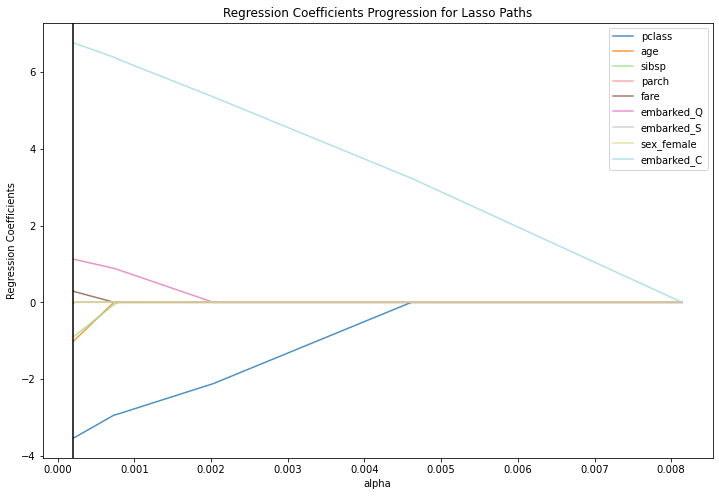

In [42]:
fig,ax = plt.subplots(figsize=(12,8))
cm = iter(plt.get_cmap('tab20')(np.linspace(0,1,X.shape[1])))
for i in range(X.shape[1]):
    c = next(cm)
    ax.plot(model.alphas_, model.coef_path_.T[:,i],
           c=c, alpha = 0.8, label = X.columns[i])

ax.axvline(model.alpha_, linestyle = '-', c = 'k', label = 'alphaCV')

plt.ylabel('Regression Coefficients')
ax.legend(X.columns, bbox_to_anchor = (1,1))
plt.xlabel('alpha')
plt.title('Regression Coefficients Progression for Lasso Paths')

## Recursive Feature Elimination 

Recursive feature elimination will remove the weakest features, then fit a model. It does this by passing in a scikit-learn model with a `.coef_` or `.feature_importances_` attribute:

In [48]:
from yellowbrick.features import RFECV 
from sklearn.ensemble import RandomForestClassifier

In [44]:
y = pd.read_excel('y.xls')
y.drop(columns='Unnamed: 0', inplace = True)

RFECV(ax=<AxesSubplot:>, cv=5, estimator=RandomForestClassifier())

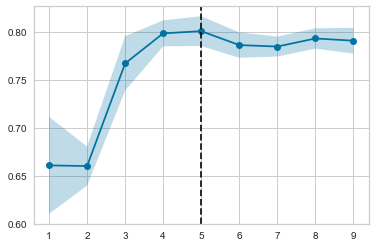

In [60]:
fig, ax = plt.subplots(figsize=(6,4))
rfe = RFECV(RandomForestClassifier(n_estimators = 100), cv = 5)
rfe.fit(X,np.ravel(y))

In [61]:
rfe.rfe_estimator_.ranking_

array([1, 1, 1, 2, 1, 5, 3, 1, 4])

In [62]:
n_feature = rfe.rfe_estimator_.n_features_

In [63]:
rfe.rfe_estimator_.support_

array([ True,  True,  True, False,  True, False, False,  True, False])

We will use recursive feature elimination to find the 10 most important features. 

In [64]:
from sklearn.feature_selection import RFE

In [65]:
model = RandomForestClassifier(n_estimators = 100)
rfe = RFE(model, n_features_to_select = rfe.rfe_estimator_.n_features_)

In [66]:
rfe.fit(X,y)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\alber\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\alber\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\alber\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [69]:
agg_X = agg_df
agg_X.drop(columns = 'survived', inplace  = True)

In [77]:
X.columns[rfe.support_]

Index(['pclass', 'age', 'sibsp', 'fare', 'sex_female'], dtype='object')

##  Mutual Information

sklearn provides nonparametric tests that will use k-nearest neighbor to determine th _mutual information_ between features and the target. Mutual information quantifies the amout of information gained by observing another variable. The value is zero or more. If the value is 0, then there is no relation between them. This number is not bounded and represents the number of _bits_ shared between the feature and the target:

In [78]:
from sklearn import feature_selection

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:ylabel='feature'>

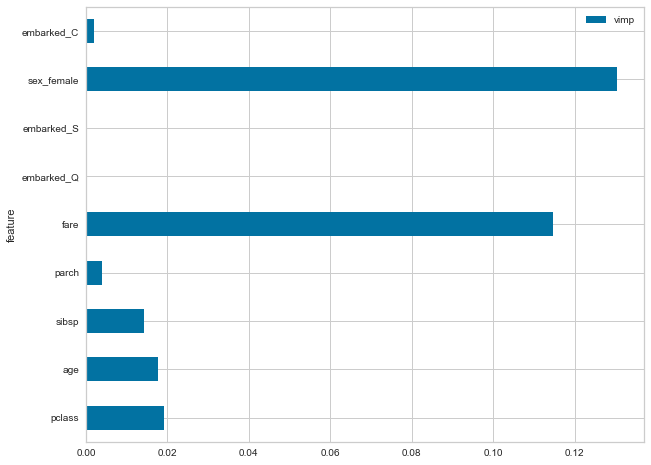

In [80]:
mic = feature_selection.mutual_info_classif(X,y)
fig, ax = plt.subplots(figsize=(10,8))

(pd.DataFrame({
    'feature': X.columns, 'vimp':mic
})).set_index('feature').plot.barh(ax=ax)

## Principal Component Analysis 

Another option for feature selection is to run principal component analysis. Once you have the main principal components, examine the features that contribute to them the most. These are features that have more variance. Note that this is an unsupervised algorithm and does not take y into account. 

## Feature Importance 

Most tree models provide access to a `.feature_importances_` attribute following training. A higher importance typically means that there is higher error when the feature is removed from the model. 